Install Libraries

In [13]:
# importing modules and packages 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerPathCollection 
from sklearn import preprocessing
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.impute import SimpleImputer
from sklearn.neighbors import LocalOutlierFactor
from sklearn.model_selection import LearningCurveDisplay, ShuffleSplit


Read data from csv file

In [14]:
# importing data 
df = pd.read_csv('Car_Details_original.csv') 
df.drop('Make', inplace = True, axis=1) 

print(df.head()) 
print(df.columns)


    Type Origin DriveTrain  EngineSize  Cylinders  Horsepower  MPG_City  \
0    SUV   Asia        All         3.5        6.0         265        17   
1  Sedan   Asia      Front         2.0        4.0         200        24   
2  Sedan   Asia      Front         2.4        4.0         200        22   
3  Sedan   Asia      Front         3.2        6.0         270        20   
4  Sedan   Asia      Front         3.5        6.0         225        18   

   MPG_Highway  Weight  Wheelbase  Length   MSRP  
0           23    4451        106     189  36945  
1           31    2778        101     172  23820  
2           29    3230        105     183  26990  
3           28    3575        108     186  33195  
4           24    3880        115     197  43755  
Index(['Type', 'Origin', 'DriveTrain', 'EngineSize', 'Cylinders', 'Horsepower',
       'MPG_City', 'MPG_Highway', 'Weight', 'Wheelbase', 'Length', 'MSRP'],
      dtype='object')


Create X & Y variables then clean data.

In [15]:
# creating feature variables 
X = df.drop('MSRP', axis= 1) 
x_array = np.array(X)
X_num = df[['EngineSize', 'Cylinders', 'Horsepower', 'MPG_City', 'MPG_Highway', 'Weight', 'Wheelbase', 'Length']]
xn_array = np.array(X_num)
print(X)
print(x_array)
print(xn_array)

y = df['MSRP']
y_array = np.array(y)
y_array = y_array.reshape(-1, 1)  
print(y)
print(y_array)

# Encoding categorical features of X
enc = preprocessing.OrdinalEncoder()
enc.fit(x_array)
x_array = enc.transform(x_array)
print(x_array)

#Standardising X & Y
x_scaler = preprocessing.StandardScaler()
x_scaler.fit(xn_array)
print(x_scaler)
print(x_scaler.mean_)
print(x_scaler.scale_)
xn_array = x_scaler.transform(xn_array)
print(xn_array)

y_scaler = preprocessing.StandardScaler()
y_scaler.fit(y_array)
print(y_scaler)
print(y_scaler.mean_)
print(y_scaler.scale_)
y_array = y_scaler.transform(y_array)
print(y_array)


      Type  Origin DriveTrain  EngineSize  Cylinders  Horsepower  MPG_City  \
0      SUV    Asia        All         3.5        6.0         265        17   
1    Sedan    Asia      Front         2.0        4.0         200        24   
2    Sedan    Asia      Front         2.4        4.0         200        22   
3    Sedan    Asia      Front         3.2        6.0         270        20   
4    Sedan    Asia      Front         3.5        6.0         225        18   
..     ...     ...        ...         ...        ...         ...       ...   
423  Sedan  Europe      Front         2.4        5.0         197        21   
424  Sedan  Europe      Front         2.3        5.0         242        20   
425  Sedan  Europe      Front         2.9        6.0         268        19   
426  Wagon  Europe      Front         1.9        4.0         170        22   
427  Wagon  Europe        All         2.5        5.0         208        20   

     MPG_Highway  Weight  Wheelbase  Length  
0             23 

Detecting Missing Values and Outliers.
Plot current heatmap.

[[  1.   0.   0. ... 300.  13.  37.]
 [  2.   0.   1. ...  50.   8.  20.]
 [  2.   0.   1. ... 105.  12.  31.]
 ...
 [  2.   1.   1. ... 201.  17.  38.]
 [  5.   1.   1. ...  55.   8.  28.]
 [  5.   1.   0. ... 228.  16.  34.]]
[[ 0.27388362  0.12365844  0.68450278 ...  1.15163078 -0.25947728
   0.18393502]
 [-1.08076419 -1.16118292 -0.22139453 ... -1.05521363 -0.86173474
  -1.00146023]
 [-0.71952477 -1.16118292 -0.22139453 ... -0.4589831  -0.37992877
  -0.23443977]
 ...
 [-0.2679755   0.12365844  0.72631343 ...  0.0989937   0.22232869
   0.25366416]
 [-1.17107405 -1.16118292 -0.63950098 ... -0.99717349 -0.86173474
  -0.44362717]
 [-0.62921492 -0.51876224 -0.10989948 ...  0.32323969  0.1018772
  -0.02525237]]
[[ 2.14856214e-01]
 [-4.61376364e-01]
 [-2.98050096e-01]
 [ 2.16469060e-02]
 [ 5.65724318e-01]
 [ 6.86544538e-01]
 [ 2.93627372e+00]
 [-3.52148702e-01]
 [ 1.63076120e-01]
 [-4.81660573e-02]
 [ 3.37546893e-02]
 [ 8.78532956e-02]
 [ 1.99141857e-01]
 [ 3.53709303e-01]
 [ 5.00548378e-

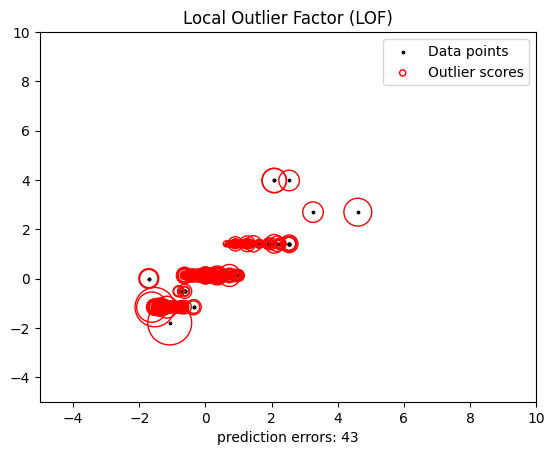

In [16]:
# Handle Missing text values in X variables.
x_imp = SimpleImputer(strategy="most_frequent")
x_imp.fit(x_array)
x_array = x_imp.transform(x_array)
print(x_array)

# Handle NaN values in X and Y variables.
xn_imp = SimpleImputer(missing_values=np.nan, strategy='mean')
xn_imp.fit(xn_array)
xn_array = xn_imp.transform(xn_array)
print(xn_array)

y_imp = SimpleImputer(missing_values=np.nan, strategy='mean')
y_imp.fit(y_array)
y_array = y_imp.transform(y_array)
print(y_array)

# Detect Outliers
ground_truth = np.ones(len(xn_array), dtype=int)
clf = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
y_pred = clf.fit_predict(xn_array)
n_errors = (y_pred != ground_truth).sum()
X_scores = clf.negative_outlier_factor_

# Plot current heatmap
def update_legend_marker_size(handle, orig):
    "Customize size of the legend marker"
    handle.update_from(orig)
    handle.set_sizes([20])

plt.scatter(xn_array[:, 0], xn_array[:, 1], color="k", s=3.0, label="Data points")
# plot circles with radius proportional to the outlier scores
radius = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min())
scatter = plt.scatter(
    xn_array[:, 0],
    xn_array[:, 1],
    s=1000 * radius,
    edgecolors="r",
    facecolors="none",
    label="Outlier scores",
)
plt.axis("tight")
plt.xlim((-5, 10))
plt.ylim((-5, 10))
plt.xlabel("prediction errors: %d" % (n_errors))
plt.legend(
    handler_map={scatter: HandlerPathCollection(update_func=update_legend_marker_size)}
)
plt.title("Local Outlier Factor (LOF)")
plt.show()


Create a Linear Regression model

In [17]:
# creating train and test sets 
X_train, X_test, y_train, y_test = train_test_split(xn_array, y_array, test_size=0.3, random_state=101) 

# creating a regression model 
model = LinearRegression()

# fitting the model 
model.fit(X_train,y_train)

# making predictions 
predictions = model.predict(X_test) 
print(predictions)

# model evaluation 
print('Test mean_squared_error : ', mean_squared_error(y_test, predictions)) 
print( 'Test mean_absolute_error : ', mean_absolute_error(y_test, predictions)) 


[[-5.84400016e-01]
 [ 1.32254861e-01]
 [ 3.27772812e-01]
 [-6.05447767e-01]
 [-5.30924351e-01]
 [ 5.57157163e-03]
 [ 2.20833707e-01]
 [-4.98926267e-01]
 [-2.69332324e-01]
 [-8.15650135e-01]
 [-6.17320953e-01]
 [-8.72374775e-01]
 [-8.97804204e-01]
 [-1.14428234e+00]
 [ 9.62466467e-01]
 [ 1.40432254e+00]
 [-1.13387324e+00]
 [ 5.60176917e-01]
 [ 3.30903599e-02]
 [-2.86362311e-01]
 [-3.12094012e-01]
 [-2.00835818e-01]
 [-3.09483596e-01]
 [ 1.29332117e+00]
 [ 5.59249270e-01]
 [-1.55699473e-01]
 [ 1.69603935e+00]
 [ 4.10522313e-02]
 [-9.82505428e-01]
 [-5.44439518e-01]
 [ 1.92166687e-01]
 [ 1.56061208e+00]
 [ 8.86217028e-02]
 [ 6.93148539e-01]
 [ 7.85415977e-01]
 [-1.13335131e+00]
 [-8.58099306e-01]
 [-7.97406408e-01]
 [-3.18175553e-01]
 [ 4.33215370e-01]
 [ 2.81923712e-01]
 [-3.67050990e-01]
 [ 9.13548203e-01]
 [-9.69742968e-01]
 [-8.24356639e-01]
 [ 1.01793539e+00]
 [ 5.36588239e-02]
 [ 2.21609503e-01]
 [-2.74060359e-01]
 [-3.57446165e-01]
 [ 1.07985887e-01]
 [-2.59053403e-02]
 [ 4.8956225

Plot learning curve for model.

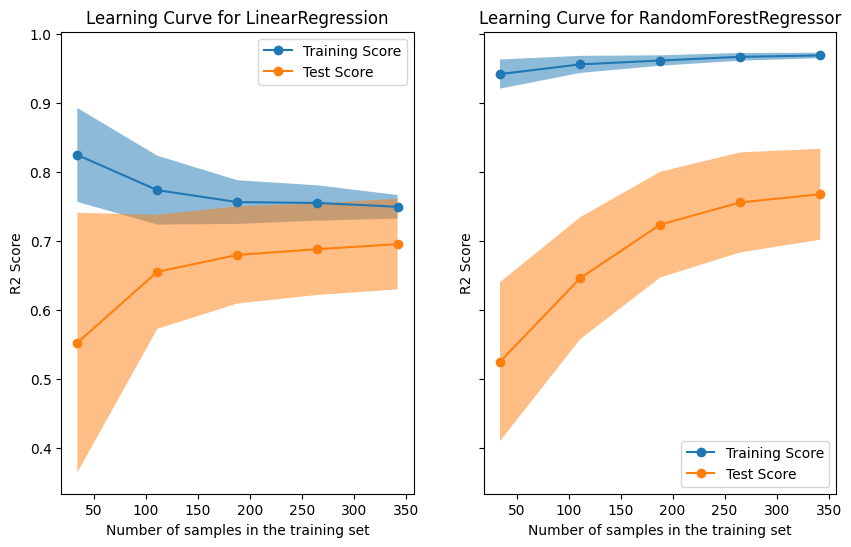

In [18]:
# Create the regression model
regressor = RandomForestRegressor(n_estimators=100, random_state=42)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 6), sharey=True)

common_params = {
    "X": xn_array,
    "y": y_array,
    "train_sizes": np.linspace(0.1, 1.0, 5),
    "cv": ShuffleSplit(n_splits=50, test_size=0.2, random_state=0),
    "score_type": "both",
    "n_jobs": 4,
    "line_kw": {"marker": "o"},
    "std_display_style": "fill_between",
    "score_name": "R2 Score",
}

# Create a list of estimators to compare
estimators = [model, regressor]

for ax_idx, estimator in enumerate(estimators):
    LearningCurveDisplay.from_estimator(estimator, **common_params, ax=ax[ax_idx])
    handles, label = ax[ax_idx].get_legend_handles_labels()
    ax[ax_idx].legend(handles[:2], ["Training Score", "Test Score"])
    ax[ax_idx].set_title(f"Learning Curve for {estimator.__class__.__name__}")